In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from numpy.core.fromnumeric import size

In [2]:
class PlotMaker:

    def __init__(self, desired_plot) -> None:
        self.desired_plot = desired_plot
        self.root = "/Users/lat/Desktop/Code/pinns-experiments/analysis_plots/"

    def plot(self):
        if self.desired_plot == "manifold_plot":
            self.manifold_plot()
        elif self.desired_plot == "dc_potential_shift_plot":
            self.dc_potential_shift_plot()

    def manifold_plot(self):
        fig = plt.figure()
        ax = fig.gca(projection='3d')
        # ax = fig.add_subplot(111, projection='3d')

        # Make data
        u = np.linspace(0, 2 * np.pi, 100)
        v = np.linspace(0, np.pi, 100)
        x = 1*np.outer(np.cos(u), np.sin(v))
        y = 1*np.outer(np.sin(u), np.sin(v))
        z = 1*np.outer(np.ones(np.size(u)), np.cos(v))

        """                                                                                                                                                    
        Scaling is done from here...                                                                                                                           
        """
        def scale():
            x_scale=1
            y_scale=1
            z_scale=1.25

            scale=np.diag([x_scale, y_scale, z_scale, 1.0])
            scale=scale*(1.0/scale.max())
            scale[3,3]=1.0

            def short_proj():
                return np.dot(Axes3D.get_proj(ax), scale)

            ax.get_proj=short_proj
        scale()
        """                                                                                                                                                    
        to here                                                                                                                                                
        """

        #ax.plot_surface(x, y, z, rstride=4, cstride=4, cmap=cm.coolwarm, alpha=0.3)
        ax.plot_surface(x, y, z, rstride=4, cstride=4, color='grey', alpha=0.3)

        # plot circular curves over the surface
        theta = np.linspace(0, 2 * np.pi, 100)
        z = np.zeros(100)
        x = 1 * np.sin(theta)
        y = 1 * np.cos(theta)

        ax.plot(x, y, z, color='black', alpha=0.75)
        ax.plot(z, x, y, color='black', alpha=0.75)

        # plot the supervised manifold
        r = np.linspace(0, 1, 100)
        v = np.linspace(0, np.pi, 100)
        x = np.outer(r, np.sin(v))
        y = np.zeros_like(x)
        z = np.outer(r, np.cos(v))

        ax.plot_surface(x, y, z, rstride=4, cstride=4, color="k")

        ax.set_xticks([-1, -0.5, 0, 0.5, 1])
        ax.set_yticks([-1, -0.5, 0, 0.5, 1])
        ax.set_zticks([-1, -0.5, 0, 0.5, 1])

        ax.set_xlabel('\n'+'x', fontsize=12, rotation = 0)
        ax.set_ylabel('\n'+'y', fontsize=12, rotation = 0)
        ax.set_zlabel('z', fontsize=12, rotation = 0)
  
        plt.show()

    def dc_potential_shift_plot(self):
        E = 1e-2
        z_minus = np.linspace(-50,-0.01,10000)
        z_plus = np.linspace(0.01,50,10000)
        V0_minus = - 1/np.abs(z_minus)
        V0_plus = - 1/np.abs(z_plus)
        V1_minus = - E*z_minus
        V1_plus = - E*z_plus
        plt.figure(figsize=(12,8))
        plt.grid(True)
        plt.xlim(-40,40)
        plt.ylim(-0.5, 0.5)
        plt.xlabel(r"$z/a_{0}$", size=15)
        plt.ylabel("Potential " + r"V / 13.6eV", rotation=90, size=15)
        plt.plot(z_minus, V0_minus+V1_minus, "-b", label="Total potential " + r"$V(r)=V_{0}(r)+V_{pert}(z)$")
        plt.plot(z_plus, V0_plus+V1_plus, "-b")
        plt.plot(z_minus, V0_minus, "-.k", label="Unperturbed potential " + r"$V_{0}(r)=\frac{Ze^{2}}{4\pi \epsilon_{0} r}$")
        plt.plot(z_plus, V0_plus, "-.k")
        plt.plot(z_minus, V1_minus, "--r", label="Perturbing potential " + r"$V_{pert}(z)=-|eE|z$")
        plt.plot(z_plus, V1_plus, "--r")
        plt.legend(loc="best", prop={'size': 15})
        plt.show()

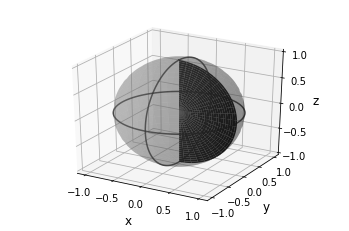

In [3]:
desired_plot = "manifold_plot"
plot_maker = PlotMaker(desired_plot)
plot_maker.plot()

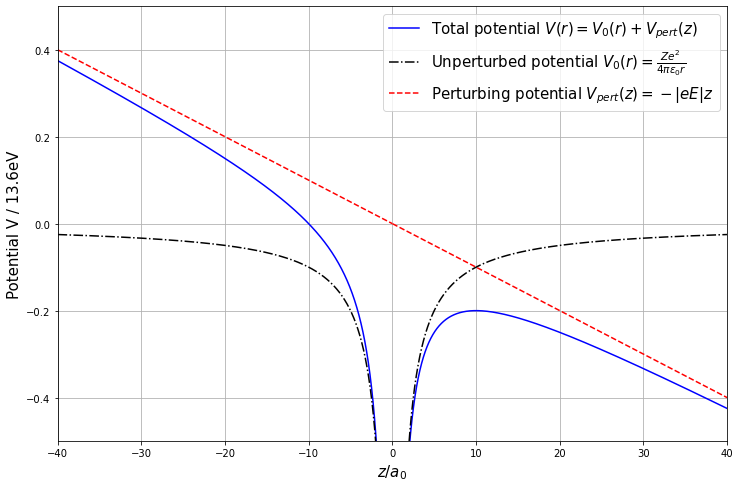

In [4]:
desired_plot = "dc_potential_shift_plot"
plot_maker = PlotMaker(desired_plot)
plot_maker.plot()